In [1]:
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random

In [23]:
def import_facebook_data(filename):
    file = open(filename,"r")
    sdata = file.read().splitlines()
    data = [list(map(int,i.split())) for i in sdata]
    d = {}
    ndata = list()
    for i in data:
        if tuple(i) not in d and tuple(list(reversed(i))) not in d:
            d[tuple(i)] = 0
            ndata.append(i)
    return np.unique(np.array(ndata),axis=0)

In [41]:
data = import_facebook_data("facebook_combined.txt")

In [12]:
ev = np.zeros((5,1))
evv = np.ones((5,5))
np.append(ev,evv,axis=1)

array([[0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.]])

In [4]:
def spectralDecomp_OneIter(data):
    ndata = np.unique(data.flatten())
    num_vert = ndata.shape[0]
    vert_mp = {}
    rev_mp = {}
    k = 0
    for i in ndata:
        vert_mp[i] = k
        rev_mp[k] = i
        k += 1
    adj_mat = np.zeros((ndata.shape[0],ndata.shape[0]),dtype=int)
    for i in data:
        adj_mat[vert_mp[i[0]],vert_mp[i[1]]] = 1
        adj_mat[vert_mp[i[1]],vert_mp[i[0]]] = 1
    
    
    deg = np.diag(adj_mat.sum(axis=0))
    L = deg-adj_mat
    
    eig_val,eig_vec = np.linalg.eigh(L)
    eig = [(i,j) for i,j in zip(eig_val,eig_vec.T)]
    
    d = sorted(eig,key= lambda x: x[0])
    for i in d:
        if i[0] > 0.00001:
            fiedler_vec = i[1]
            break
    lst = sorted(list(enumerate(fiedler_vec)),key=lambda x: x[1])
    el = list(zip(*lst))
    part = np.where(np.array(el[1])>=0)[0].shape[0]
    
    com = 0
    if part>num_vert//2:
        com = 1
    graph_partition = np.zeros((num_vert,2),dtype=int)
    
    for i in lst:
        if i[1]>0:
            graph_partition[i[0]][0] = rev_mp[i[0]]
            graph_partition[i[0]][1] = com
        else:
            graph_partition[i[0]][0] = rev_mp[i[0]]
            graph_partition[i[0]][1] = com^1
    return fiedler_vec,adj_mat,graph_partition

In [50]:
fiedler_vec,adj_mat,graph_partition = spectralDecomp_OneIter(data)

In [18]:
lst = sorted(list(enumerate(fiedler_vec)),key=lambda x: x[1])
el = list(zip(*lst))
#np.where(np.array(el[1])>=0)

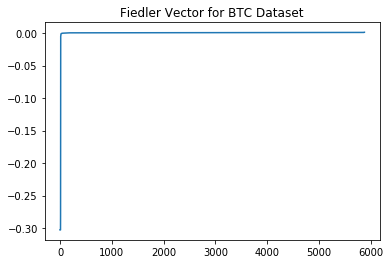

In [19]:
plt.plot(el[1])
plt.title('Fiedler Vector for BTC Dataset')
plt.savefig('btc_fiedler.png')

In [80]:
pos_node = []
neg_node = []
for i in enumerate(fiedler_vec):
    if i[1]>0:
        neg_node.append(i[0])
    else:
        pos_node.append(i[0])

[686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782,
 783,
 784,
 785,
 786,
 787,
 788,
 789,
 790,
 791,
 792,
 793,
 794,
 795,
 796,
 797,
 798,
 799,
 800,
 801,
 802,
 803,
 804,
 805,
 806,
 807,
 808,
 809,
 810,
 811,
 812,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 832,
 833,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852

In [85]:
for i in graph_partition:
    j = i[1]
    if j==0:
        if i[0] in neg_node:
            c = 1
        else:
            print(i)
            print("No")
            break

[0 0]
No


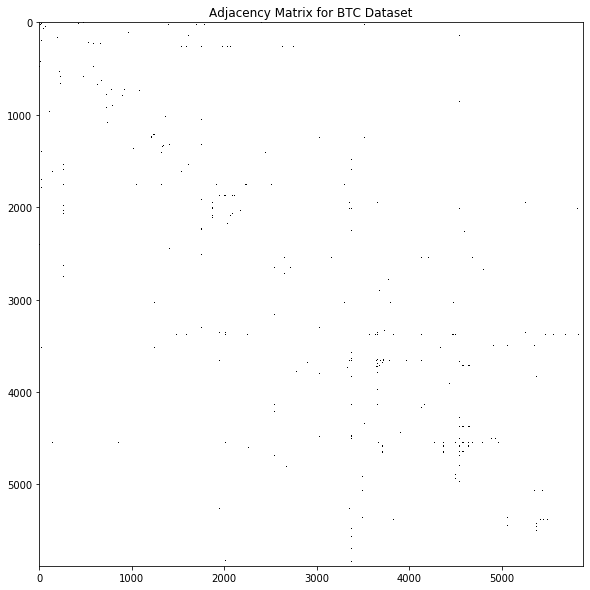

In [20]:
fig = plt.figure(figsize=(10, 10)) # in inches
plt.imshow(adj_mat,
                  cmap="Greys",
                  interpolation="none")
plt.title('Adjacency Matrix for BTC Dataset')
plt.savefig('btc_adj.png')

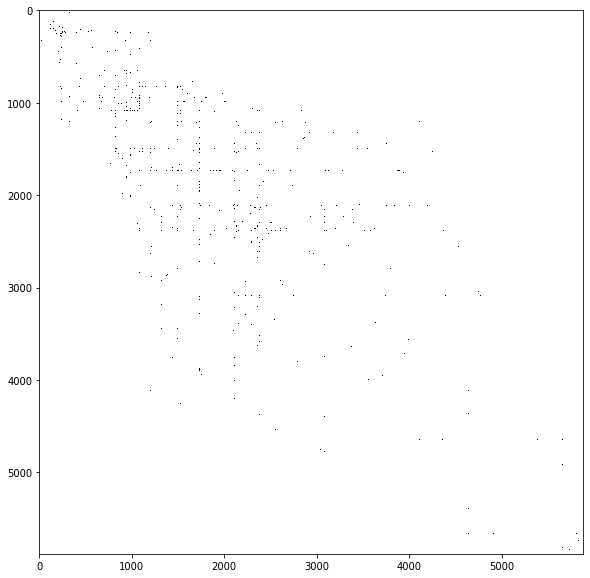

In [182]:
idx = np.ix_(el[0],el[0])
fig = plt.figure(figsize=(10, 10)) # in inches
plt.imshow(adj_mat[idx],
                  cmap="Greys",
                  interpolation="none")

In [321]:
def spectralDecomposition(data):
    fiedler_vec,adj_mat,graph_partition = spectralDecomp_OneIter(data)
    comm = [[],[]]
    for i in graph_partition:
        comm[i[1]].append(i[0])
    comm = np.unique(comm,axis=0)
    pos_ed = []
    for i in comm[0]:
        for j in comm[0]:
            if adj_mat[i][j]==1:
                pos_ed.append([i,j])
    neg_ed = []
    for i in comm[1]:
        for j in comm[1]:
            if adj_mat[i][j]==1:
                neg_ed.append([i,j])
    pos_ed = np.array(pos_ed)
    neg_ed = np.array(neg_ed)
    
    pos = spectralDecomposition(pos_ed)
    neg = spectralDecomposition(neg_ed)
    num = -1
    
    
    
    
    
    
    
    
    
    
    
    return graph_partition

In [25]:
def spectralDecomposition(data):
    num_vert = data.max()
    adj_mat = np.zeros((num_vert+1,num_vert+1),dtype=int)
    for i in data:
        adj_mat[i[0],i[1]] = 1
        adj_mat[i[1],i[0]] = 1
    
    deg = np.diag(adj_mat.sum(axis=0))
    L = deg-adj_mat
    
    deg_half = 1.0/np.sqrt(adj_mat.sum(axis=0))
    deg_half[np.isinf(deg_half)] = 0
    deg_h = np.diag(deg_half)
    norm_L = deg_h@(L@deg_h)
    
    eig_val,eig_vec = np.linalg.eigh(norm_L)
    d = {}
    for i,j in zip(eig_val,eig_vec.T):
        d[i] = j.T
    d = dict(sorted(d.items()))
    
    eig = np.sort(eig_val)
    k = 0
    m = -1
    for i in range(1,eig.shape[0]):
        if eig[i]-eig[i-1]>m:
            m = eig[i]-eig[i-1]
            k = i
    graph_partition = np.zeros((num_vert+1,2),dtype=int)
    for i in range(num_vert+1):
        graph_partition[i][0] = i
    clst_size = 4039
    for i in range(7):
        print("Community : "+str(i))
        fiedler_vec,adj_mat,graph_tmp = spectralDecomp_OneIter(data)
        ndata = []
        for j in range(adj_mat.shape[0]):
            if graph_tmp[j][1] == 0:
                continue
            for l in range(adj_mat.shape[0]):
                if adj_mat[j][l]==1 and graph_tmp[l][1] != 0:
                    ndata.append([graph_tmp[j][0],graph_tmp[l][0]])
        data = np.array(ndata)
        for j in graph_tmp:
            if j[1]==0:
                continue
            graph_partition[j[0]][1] = i+1
        clst_size = np.unique(data.flatten()).shape[0]
        i += 1
    return graph_partition

In [42]:
graph_partition_fb = spectralDecomposition(data)

Community : 0
Community : 1
Community : 2
Community : 3
Community : 4
Community : 5
Community : 6


In [52]:
mat = np.diag((1,2,3,4,5,6))
idx = [2,5,1,3,4,0]
print(mat)
mat[idx][idx]

[[1 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


array([[0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 6],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 5, 0],
       [0, 0, 3, 0, 0, 0]])

In [33]:
def createSortedAdjMat(graph_partition_fb, nodes_connectivity_list_fb):
    num_vert = nodes_connectivity_list_fb.max()
    adj_mat = np.zeros((num_vert+1,num_vert+1),dtype=int)
    for i in nodes_connectivity_list_fb:
        adj_mat[i[0],i[1]] = 1
        adj_mat[i[1],i[0]] = 1
    
    idx = np.array(sorted(graph_partition_fb,key=lambda x:x[1])).T[0]
    ix = np.ix_(idx,idx)
    n_adj_mat = adj_mat[ix]
    return n_adj_mat

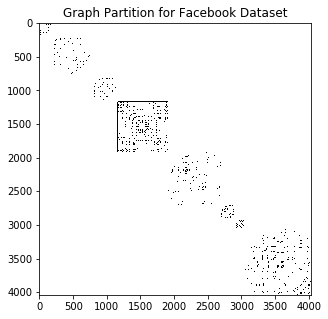

In [29]:
clustered_adj_mat_fb = createSortedAdjMat(graph_partition_fb, data)

In [51]:
g = nx.from_numpy_matrix(adj_mat)

In [52]:
for i in g.nodes():
    g.nodes[i]['weights'] = graph_partition_fb[i][1]

In [53]:
nx.write_gexf(g,"facebook7.gexf")

In [44]:
num_cluster = np.unique(graph_partition.T[1]).shape[0]
lst_cluster = [[] for i in range(num_cluster)]
for i in graph_partition:
    lst_cluster[i[1]].append(i[0])

In [45]:
def plot(list_clusters, G1):
    def color_list(n):
        colors= []
        for  i in range(n):
            color = "#" + "%06x" % random.randint(0, 0xFFFFFF)
            colors.append(color)
        return colors
    colors = color_list(len(list_clusters))
    fig = plt.figure(figsize=(30,30))
    pos =nx.spring_layout(G1)
    nx.draw_networkx_edges(G1,pos)
    for i in range(len(list_clusters)):
        nx.draw_networkx_nodes(G1,pos,nodelist=list_clusters[i],node_color=colors[i], node_size=100,)

NetworkXError: Node 6000 has no position.

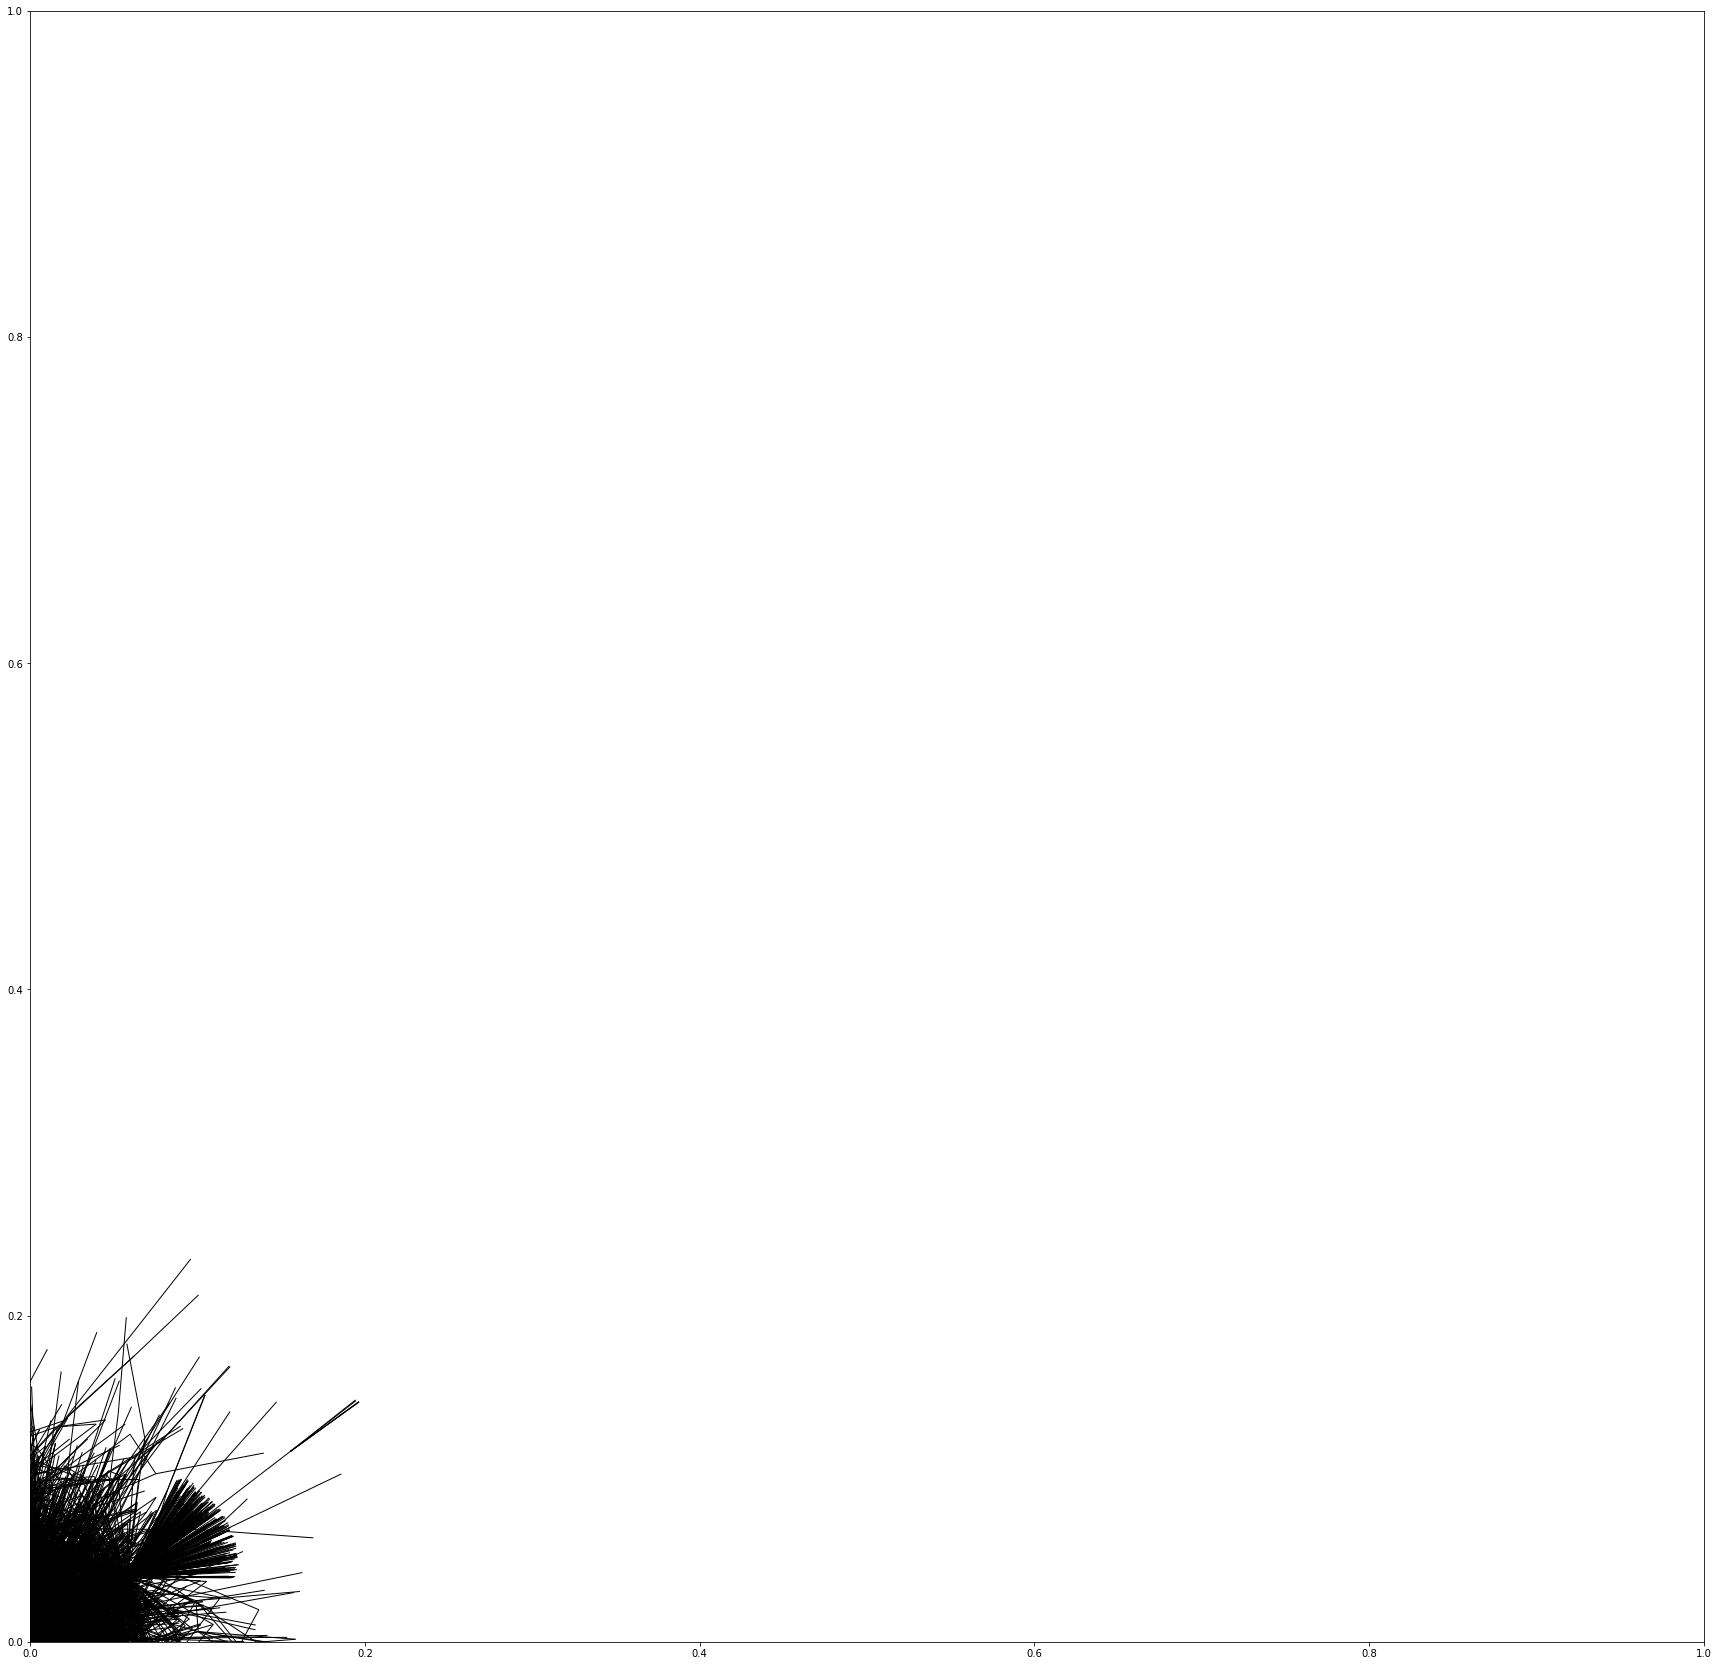

In [46]:
plot(lst_cluster,g)

In [94]:
g = nx.from_numpy_matrix(adj_mat)

In [82]:
def louvain_one_iter(data):
    

array([0, 2])

In [ ]:
graph_partition_louvain_fb = louvain_one_iter(nodes_connectivity_list_fb)

In [30]:
import csv
def import_bitcoin_data(file_path):
    data = []
    with open(file_path, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            data.append(row)
    data = np.array(data)
    return np.array(data[:,[0,1]]).astype(int)

In [31]:
data = import_bitcoin_data("soc-sign-bitcoinotc.csv")

In [110]:
node = data.max()

In [116]:
values = np.unique(data.flatten())
values

array([   1,    2,    3, ..., 6003, 6004, 6005])

In [117]:
for i in range(node):
    if i not in values:
        print(i)

0
11
12
14
18
22
24
27
30
38
40
42
43
48
49
50
58
59
63
67
73
82
84
85
90
91
92
98
102
117
118
121
123
124
126
128
130
136
151
226
568
1339
1398
1563
1638
1652
1996
2075
2294
2361
2457
2467
2554
2560
2583
2650
2764
2842
2951
2957
2967
2979
3004
3007
3014
3039
3057
3152
3186
3339
3350
3356
3402
3461
3530
3638
3809
3833
4009
4021
4193
4194
4223
4260
4272
4332
4500
4510
4561
4575
4817
4827
5102
5266
5493
5509
5535
5562
5572
5584
5620
5621
5628
5637
5651
5671
5690
5696
5697
5716
5727
5728
5734
5735
5751
5758
5771
5787
5794
5812
5834
5841
5842
5865
6001


In [17]:
fiedler_vec,adj_mat,graph_partition = spectralDecomp_OneIter(data)

In [118]:
ndata = np.unique(data.flatten())
num_vert = ndata.shape[0]
vert_mp = {}
rev_mp = {}
k = 0
for i in ndata:
    vert_mp[i] = k
    rev_mp[k] = i
    k += 1
adj_mat = np.zeros((ndata.shape[0],ndata.shape[0]),dtype=int)
for i in data:
    adj_mat[vert_mp[i[0]],vert_mp[i[1]]] = 1
    adj_mat[vert_mp[i[1]],vert_mp[i[0]]] = 1

deg = np.diag(adj_mat.sum(axis=0))
L = deg-adj_mat

eig_val,eig_vec = np.linalg.eigh(L)
eig = [(i,j) for i,j in zip(eig_val,eig_vec.T)]

d = sorted(eig,key= lambda x: x[0])

In [135]:
eig_val[:10]

array([-4.82349549e-15, -7.07972106e-16,  2.22044605e-16,  3.96774812e-14,
        7.28688746e-02,  1.45675783e-01,  1.79954021e-01,  1.81349153e-01,
        1.97644298e-01,  2.31524561e-01])

In [138]:
def dfs(idx,vis,M,lst,comp):
    vis[idx]=1
    for i in range(M[idx].shape[0]):
        if (vis[i] == 0 and M[idx][i]==1):
            lst[comp].append(i)
            dfs(i,vis,M,lst,comp)
    
def findCircleNum(M):
    vis = np.zeros((M.shape[0]),dtype=int)
    lst = [[] for i in range(M.shape[0])]
    count=0
    for i in range(M.shape[0]):
        if(vis[i]==0):
            lst[i].append(i)
            count+=1
            dfs(i,vis,M,lst,i)
    comp = [x for x in lst if x!= []]
    return comp

In [140]:
comp = findCircleNum(adj_mat)

In [148]:
comp = [x for x in comp if x!= []]
comp[1]

[3686, 3687]

In [159]:
lst = sorted(list(enumerate(fiedler_vec)),key=lambda x: x[1])
el = list(zip(*lst))
el[1]

(-0.30282488082928166,
 -0.30282488082928144,
 -0.3028248808292814,
 -0.30282488082928133,
 -0.30282488082928133,
 -0.30282488082928105,
 -0.302824880829281,
 -0.3028248808292807,
 -0.3028248808292807,
 -0.30282488082928066,
 -0.28075837257564124,
 -0.039634743407428744,
 -0.020845517999105872,
 -0.005102808377817713,
 -0.004730972474250094,
 -0.003975964711095255,
 -0.0023420258249829164,
 -0.0023130584051128775,
 -0.0013521288630506192,
 -0.001255647260288563,
 -0.0012556472602885133,
 -0.0010213042297474262,
 -0.0008429301189882301,
 -0.0008429301189882043,
 -0.0007815067498880566,
 -0.0007320939718562801,
 -0.0006990916084798889,
 -0.0006759445405311551,
 -0.0005795330777942737,
 -0.0005795330777942693,
 -0.0005795330777942546,
 -0.0005795330777942465,
 -0.000579533077794239,
 -0.0005795330777942249,
 -0.0005795330777941865,
 -0.0005795330777937884,
 -0.0005373031546470644,
 -0.000499867765650705,
 -0.000497693100782965,
 -0.00046142676465406356,
 -0.00040613897153386573,
 -0.00038

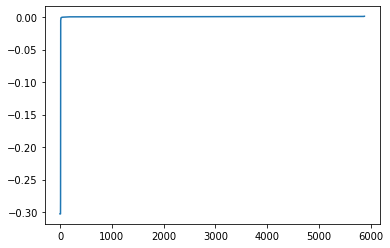

In [161]:
plt.plot(el[1])

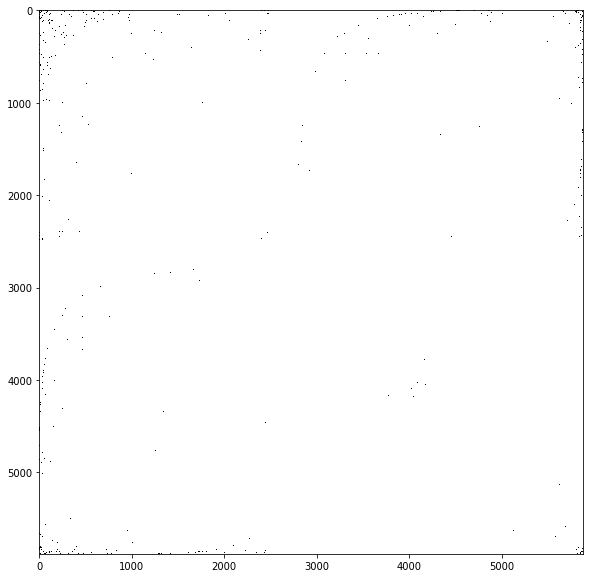

In [156]:
idx = np.ix_(el[0],el[0])
adj_mat[idx]
fig = plt.figure(figsize=(10, 10)) # in inches
plt.imshow(adj_mat[idx],
                  cmap="Greys",
                  interpolation="none")

In [32]:
graph_partition_fb = spectralDecomposition(data)

D:\Application\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Community : 0
Community : 1
Community : 2
Community : 3
Community : 4
Community : 5
Community : 6


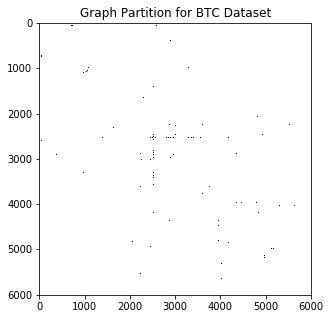

In [34]:
clustered_adj_mat_fb = createSortedAdjMat(graph_partition_fb, data)